In [1]:
import sys
sys.path.append(r"C:\Users\afeki\Desktop\code\CrossValidatedFeatureSelection\experiments")  # path contains python_file.py
from plot_utils import get_results_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
FOLDER = "C:/Users/afeki/Desktop/code/CrossValidatedFeatureSelection/experiments/gbm_classification/criteo_ctr/30FoldCV_30k"
fi, metrics = get_results_data(FOLDER, normalize=True, one_hot=False)
metrics.to_csv("metrics_summary.csv", index = None)

def translate_value_names(df):
    df_map = { 'gain': 'Gain', 'permutation_test' : "Permutation \n Test", 'permutation_train' : 'Permutation \n Train', 'shap_test': 'Shap','shap_train': 'Shap Train'}
    model_map = {'LGBM' : 'LGBM', 'CATBOOST' : 'CATBOOST', 'Ours' : 'Ours', 'Vanilla_GBM' : 'Vanilla GBM', 'SKLEARN_MI' : 'SKLEARN Mean Imputing','XGBOOST_MI' : 'XGBOOST Mean Imputing'}
    df['fi_type'] = df['fi_type'].map(df_map)
    df['model'] = df['model'].map(model_map)
    df.columns = ['Features', "Feature Importance Type", 'Value', 'exp','Model']
    
translate_value_names(fi)
fi.head(2)

,Features,Feature Importance Type,Value,exp,Model
0,C1,Gain,0.000000,0,LGBM
1,C14,Gain,0.110561,0,LGBM


In [3]:
dataset = pd.read_csv("C:/Users/afeki/Desktop/code/CrossValidatedFeatureSelection/datasets/criteo_ctr_prediction/train_30k.csv")
dataset = dataset.drop(columns=['click', 'hour', 'id', 'Unnamed: 0'])
print(dataset.shape)
l = []
for col in dataset.columns:
    l.append([col, dataset[col].dtype, dataset[col].isna().sum(),len(np.unique(dataset[col]))])  
df = pd.DataFrame(l, columns = ['feature','dtype', '# nan values','n_unique_values'])
df = df.sort_values('n_unique_values', ascending = False)
display(df)

(30000, 21)


,feature,dtype,# nan values,n_unique_values
9,device_ip,object,0,25573
8,device_id,object,0,4928
10,device_model,object,0,2154
13,C14,int64,0,1282
2,site_id,object,0,918
3,site_domain,object,0,784
5,app_id,object,0,723
16,C17,int64,0,372
19,C20,int64,0,145
6,app_domain,object,0,64


In [4]:
feature_order = df['feature'].values
include_features = [f  for f in feature_order if list(feature_order).index(f) <= list(feature_order).index('app_category')]
feature_order = [f for f in feature_order if f in include_features]
list(feature_order)

['device_ip',
 'device_id',
 'device_model',
 'C14',
 'site_id',
 'site_domain',
 'app_id',
 'C17',
 'C20',
 'app_domain',
 'C19',
 'C21',
 'app_category']

In [5]:
fi = fi[fi['Features'].isin(include_features)]

C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\afeki\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

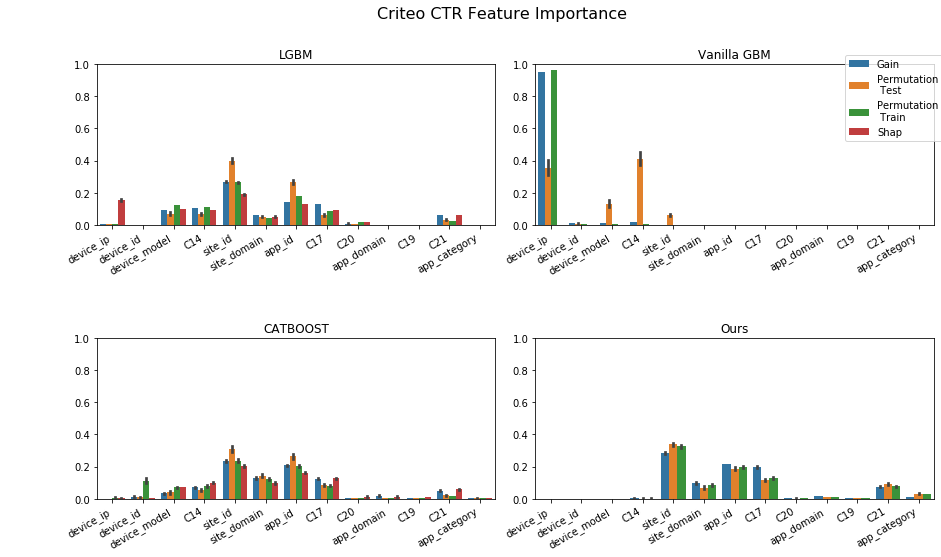

In [6]:
def paper_graph(data,title):
    models = ['LGBM', 'Vanilla GBM', 'CATBOOST', 'Ours']
    fig,a =  plt.subplots(2,2,  figsize=(15, 8))
    plt.subplots_adjust(wspace = 0.1, hspace = 0.7)
    counter = 0
    for i in range(2):
        for j in range(2):
            temp_model = models[counter]
            plot_data = data[(data.Model == temp_model)]
            plot_data[" "] = plot_data["Value"]
            plot_data = plot_data.set_index('Features')
            plot_data = plot_data.loc[feature_order,:].reset_index()
            ylim = 1
            a[i][j].set_title(temp_model)
            a[i][j].set_ylim(0,ylim)
            a[i][j].yaxis.set_label_coords(-0.2, 0.5)
            sns.barplot(x='Features', y=" ", hue="Feature Importance Type", data=plot_data, ax = a[i][j])
            a[i][j].set_xticklabels(a[i][j].get_xticklabels(), rotation=30, horizontalalignment='right')
            a[i][j].set_xlabel('')
            if temp_model != 'Ours':
                handles, labels = a[i][j].get_legend_handles_labels()
            a[i][j].legend_.remove()
            counter += 1
    fig.legend(handles, labels, bbox_to_anchor = [0.88,0.88])
    fig.suptitle(title, fontsize=16)
    fig.savefig(F"{title}.png")
    plt.show()
    
paper_graph(fi[fi["Feature Importance Type"] != 'Shap Train'],'Criteo CTR Feature Importance') 

In [7]:
fi.head()

,Features,Feature Importance Type,Value,exp,Model
1,C14,Gain,0.110561,0,LGBM
4,C17,Gain,0.119574,0,LGBM
6,C19,Gain,0.000931,0,LGBM
7,C20,Gain,0.008748,0,LGBM
8,C21,Gain,0.067382,0,LGBM


In [8]:
mean_fi = fi.groupby(['Model', 'Features','Feature Importance Type'])['Value'].mean().reset_index()
mean_fi = mean_fi[mean_fi['Features'].isin(['device_ip','device_id','device_model'])]
mean_fi

,Model,Features,Feature Importance Type,Value
40,CATBOOST,device_id,Gain,0.014426
41,CATBOOST,device_id,Permutation \n Test,0.009632
42,CATBOOST,device_id,Permutation \n Train,0.113386
43,CATBOOST,device_id,Shap,0.005433
44,CATBOOST,device_id,Shap Train,0.025665
...,...,...,...,...
349,XGBOOST Mean Imputing,device_model,Gain,0.014017
350,XGBOOST Mean Imputing,device_model,Permutation \n Test,0.085555
351,XGBOOST Mean Imputing,device_model,Permutation \n Train,0.001904
352,XGBOOST Mean Imputing,device_model,Shap,0.112096


In [10]:
for model in mean_fi.Model.unique():
    print(model + "\n")
    temp_fi = mean_fi[mean_fi.Model == model]
    display(temp_fi.pivot(index = 'Features', columns = 'Feature Importance Type', values = 'Value'))
    print("\n")

CATBOOST



Feature Importance Type,Gain,Permutation \n Test,Permutation \n Train,Shap,Shap Train
Features,,,,,
device_id,0.014426,0.009632,0.113386,0.005433,0.025665
device_ip,0.000416,0.000460,0.007611,0.004526,0.001968
device_model,0.033768,0.039955,0.072549,0.073324,0.068022




LGBM



Feature Importance Type,Gain,Permutation \n Test,Permutation \n Train,Shap,Shap Train
Features,,,,,
device_id,0.000017,3.476366e-16,0.000013,0.000028,0.000044
device_ip,0.004992,6.270460e-03,0.009483,0.155199,0.010502
device_model,0.091840,7.093661e-02,0.126575,0.098033,0.111691




Ours



Feature Importance Type,Gain,Permutation \n Test,Permutation \n Train
Features,,,
device_id,0.000027,0.000000e+00,0.000034
device_ip,0.000000,0.000000e+00,0.000000
device_model,0.000001,4.456131e-17,0.000002




SKLEARN Mean Imputing



Feature Importance Type,Gain,Permutation \n Test,Permutation \n Train,Shap,Shap Train
Features,,,,,
device_id,0.014179,0.011823,0.023633,0.022164,0.042883
device_ip,0.972263,0.296347,0.967027,0.609451,0.890558
device_model,0.002943,0.092925,0.003247,0.105988,0.016032




Vanilla GBM



Feature Importance Type,Gain,Permutation \n Test,Permutation \n Train,Shap,Shap Train
Features,,,,,
device_id,0.010667,0.006621,0.009141,NaN,NaN
device_ip,0.950494,0.357115,0.963191,NaN,NaN
device_model,0.015290,0.131790,0.009800,NaN,NaN




XGBOOST Mean Imputing



Feature Importance Type,Gain,Permutation \n Test,Permutation \n Train,Shap,Shap Train
Features,,,,,
device_id,0.034684,0.020161,0.010018,0.027883,0.045098
device_ip,0.866102,0.312532,0.984033,0.598729,0.885607
device_model,0.014017,0.085555,0.001904,0.112096,0.021935
